## look at snow climatology for 1958 and earlier

In [ ]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cf
from matplotlib import pyplot as plt
import matplotlib.path as mpath
from pathlib import Path

In [ ]:
datadir = Path("/Users/christine/Projects/dyndowndata")
JRA55_clim= datadir / "jra55_clim/jra55_snwe_clim_1966_1985"

In [ ]:
ds = xr.open_dataset(JRA55_clim, engine="cfgrib")
ds

<xarray.Dataset>
Dimensions:     (time: 366, latitude: 320, longitude: 640)
Coordinates:
  * time        (time) datetime64[ns] 1984-02-29T18:00:00 ... 1985-12-31T18:0...
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 89.57 89.01 88.45 ... -88.45 -89.01 -89.57
  * longitude   (longitude) float64 0.0 0.5625 1.125 1.688 ... 358.3 358.9 359.4
    valid_time  (time) datetime64[ns] ...
Data variables:
    sd          (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             rjtd
    GRIB_centreDescription:  Japanese Meteorological Agency - Tokyo
    GRIB_subCentre:          241
    Conventions:             CF-1.7
    institution:             Japanese Meteorological Agency - Tokyo
    history:                 2024-09-11T20:11 GRIB to CDM+CF via cfgrib-0.9.1...

Set some common parameters for plotting.

In [ ]:
cmap = plt.get_cmap('Blues', 6)
mydataarray = ds.sd.isel(time=1)

Straightforward raster plot.

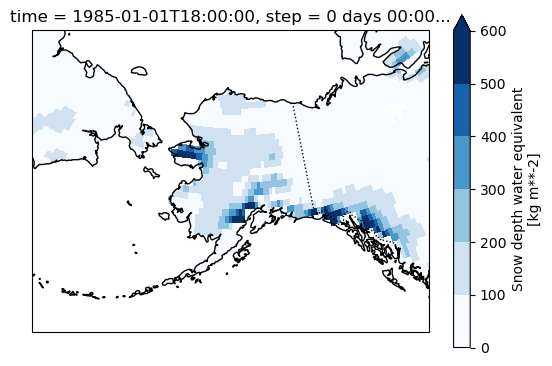

In [ ]:
projection = ccrs.AlbersEqualArea(
    central_longitude=-154.0, central_latitude=50.0, 
    standard_parallels=(55.0, 65.0))
ax = plt.axes(projection=projection)
ax.set_extent([-180, -130, 48, 75])

ds.sd.isel(time=1).plot(
    cmap=cmap, cbar_kwargs={"shrink": 0.9},
    transform=ccrs.PlateCarree(),
    ax=ax,
    vmax=600
)

# add additional features and corrections
ax.coastlines()
ax.add_feature(cf.BORDERS, linestyle=':')



Raster plot with axes oriented along the projection directions. With gridlines.

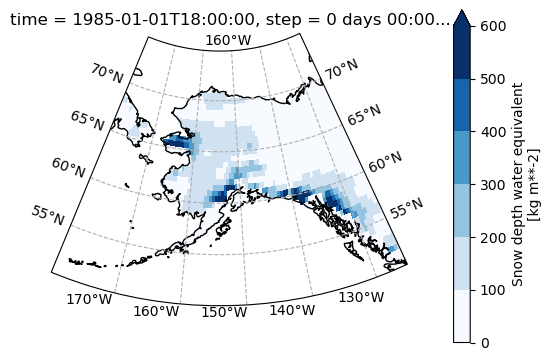

In [ ]:
# set up projection and axes
projection = ccrs.AlbersEqualArea(
    central_longitude=-154.0, central_latitude=50.0, 
    standard_parallels=(55.0, 65.0))
ax = plt.axes(projection=projection)

# set up plot area
xlim = [-180, -125]
ylim = [50, 75]
rect = mpath.Path([[xlim[0], ylim[0]],
                   [xlim[1], ylim[0]],
                   [xlim[1], ylim[1]],
                   [xlim[0], ylim[1]],
                   [xlim[0], ylim[0]],
                   ]).interpolated(20)

# transform extent to projection
proj_to_data = ccrs.PlateCarree()._as_mpl_transform(ax) - ax.transData
rect_in_target = proj_to_data.transform_path(rect)
ax.set_boundary(rect_in_target)
ax.set_extent([xlim[0], xlim[1], ylim[0]-5, ylim[1]]) #to avoid further clipping

# add additional features and corrections
# ax.add_feature(cf.BORDERS, linestyle=':')
ax.coastlines()
gl = ax.gridlines(draw_labels=True, 
                   
                linestyle='--')
gl.xlabel_style = {'rotation': 0}
gl.top_labels = False

# plot the data
mydataarray.plot(
    cmap=cmap, cbar_kwargs={"shrink": 0.9},
    transform=ccrs.PlateCarree(),
    ax=ax,
    vmax=600
)


Or alternatively, as a contour plot.

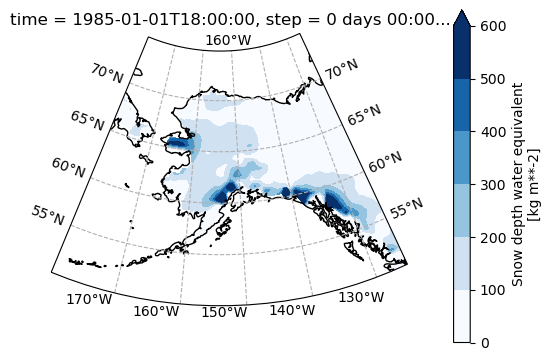

In [ ]:
# set up projection and axes
projection = ccrs.AlbersEqualArea(
    central_longitude=-154.0, central_latitude=50.0, 
    standard_parallels=(55.0, 65.0))
ax = plt.axes(projection=projection)

# set up plot area
xlim = [-180, -125]
ylim = [50, 75]
rect = mpath.Path([[xlim[0], ylim[0]],
                   [xlim[1], ylim[0]],
                   [xlim[1], ylim[1]],
                   [xlim[0], ylim[1]],
                   [xlim[0], ylim[0]],
                   ]).interpolated(20)

# transform extent to projection
proj_to_data = ccrs.PlateCarree()._as_mpl_transform(ax) - ax.transData
rect_in_target = proj_to_data.transform_path(rect)
ax.set_boundary(rect_in_target)
ax.set_extent([xlim[0], xlim[1], ylim[0]-5, ylim[1]]) #to avoid further clipping

# add additional features and corrections
# ax.add_feature(cf.BORDERS, linestyle=':')
ax.coastlines()
gl = ax.gridlines(draw_labels=True, 
                   
                linestyle='--')
gl.xlabel_style = {'rotation': 0}
gl.top_labels = False

# plot the data
mydataarray.plot.contourf(
    cmap=cmap, cbar_kwargs={"shrink": 0.9},
    transform=ccrs.PlateCarree(),
    ax=ax,
    vmax=600
)

There seems to be a bug in Cartopy for non-rectilinear axes, whereby not all labels are correctly removed via `top_labels = False`. See https://github.com/SciTools/cartopy/issues/1722. We can see the extra top label by inspecting the `geo_label_artists` attribute of the `Gridliner` instance `gl` or alternatively `_labels`. 

In [ ]:
[item.artist for item in gl._labels]

[Text(-486994.3152992651, 2821930.1455179127, '170°W'),
 Text(427090.6111801793, 2808165.057393537, '140°W'),
 Text(721655.7626538444, 2894816.4309219345, '130°W'),
 Text(-1621227.1249702326, 875491.8824032007, '55°N'),
 Text(-1146013.4874187186, 139675.65189775988, '170°W'),
 Text(-433363.03810100583, 20406.656829759944, '160°W'),
 Text(-184150.8471476268, 2771304.8277910203, '160°W'),
 Text(289128.1925615845, 9510.528811230091, '150°W'),
 Text(122860.08859119192, 2766681.589333443, '150°W'),
 Text(1005031.5771568557, 107349.68196401955, '140°W'),
 Text(1698281.5876197936, 311051.86397921946, '130°W'),
 Text(1787308.4217370972, 948213.8823475984, '55°N'),
 Text(-1408297.699479109, 1391460.0879653234, '60°N'),
 Text(1552566.13945329, 1454630.8946005104, '60°N'),
 Text(-1195144.795749321, 1907969.823499265, '65°N'),
 Text(1317577.4854354504, 1961579.412452833, '65°N'),
 Text(-983894.3515296867, 2419869.54039748, '70°N'),
 Text(1084686.1821540627, 2464003.248670186, '70°N')]

We can remove the text from the incrimitated artist(s). 

In [ ]:
for item in gl._labels:
    if item.artist.get_position()[1] > 2000000:
        if '160°W' == item.artist.get_text():
            item.artist.set_text('')

[item.artist for item in gl._labels]

[Text(-486994.3152992651, 2821930.1455179127, '170°W'),
 Text(427090.6111801793, 2808165.057393537, '140°W'),
 Text(721655.7626538444, 2894816.4309219345, '130°W'),
 Text(-1621227.1249702326, 875491.8824032007, '55°N'),
 Text(-1146013.4874187186, 139675.65189775988, '170°W'),
 Text(-433363.03810100583, 20406.656829759944, '160°W'),
 Text(-184150.8471476268, 2771304.8277910203, ''),
 Text(289128.1925615845, 9510.528811230091, '150°W'),
 Text(122860.08859119192, 2766681.589333443, '150°W'),
 Text(1005031.5771568557, 107349.68196401955, '140°W'),
 Text(1698281.5876197936, 311051.86397921946, '130°W'),
 Text(1787308.4217370972, 948213.8823475984, '55°N'),
 Text(-1408297.699479109, 1391460.0879653234, '60°N'),
 Text(1552566.13945329, 1454630.8946005104, '60°N'),
 Text(-1195144.795749321, 1907969.823499265, '65°N'),
 Text(1317577.4854354504, 1961579.412452833, '65°N'),
 Text(-983894.3515296867, 2419869.54039748, '70°N'),
 Text(1084686.1821540627, 2464003.248670186, '70°N')]

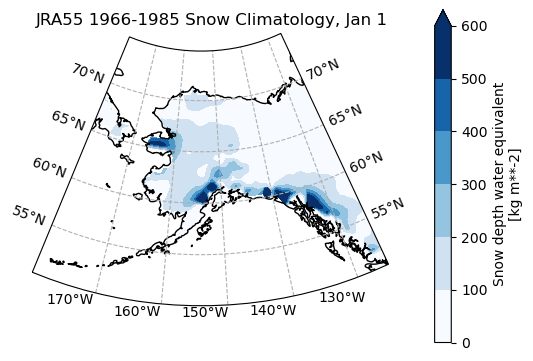

In [ ]:
# set up projection and axes
projection = ccrs.AlbersEqualArea(
    central_longitude=-154.0, central_latitude=50.0, 
    standard_parallels=(55.0, 65.0))
ax = plt.axes(projection=projection)

# set up plot area
xlim = [-180, -125]
ylim = [50, 75]
rect = mpath.Path([[xlim[0], ylim[0]],
                   [xlim[1], ylim[0]],
                   [xlim[1], ylim[1]],
                   [xlim[0], ylim[1]],
                   [xlim[0], ylim[0]],
                   ]).interpolated(20)

# transform extent to projection
proj_to_data = ccrs.PlateCarree()._as_mpl_transform(ax) - ax.transData
rect_in_target = proj_to_data.transform_path(rect)
ax.set_boundary(rect_in_target)
ax.set_extent([xlim[0], xlim[1], ylim[0]-5, ylim[1]]) #to avoid further clipping

# add additional features and corrections
# ax.add_feature(cf.BORDERS, linestyle=':')

ax.coastlines()
gl = ax.gridlines(draw_labels=True, 
                   
                linestyle='--')
gl.xlabel_style = {'rotation': 0}
gl.top_labels = False
plt.draw()
for item in gl._labels:
    if item.artist.get_position()[1] > 2000000:
        if item.artist.get_text() in ['150°W', '160°W', '170°W']:
            item.artist.set_text('')

# plot the data
mydataarray.plot.contourf(
    cmap=cmap, cbar_kwargs={"shrink": 0.9},
    transform=ccrs.PlateCarree(),
    ax=ax,
    vmax=600,
)
plt.title("JRA55 1966-1985 Snow Climatology, Jan 1")
plt.show()

